In [1]:
# 元ファイルはfig1_a_b_execution.ipynb

import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.colorbar as mcolorbar
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
from matplotlib.colors import hsv_to_rgb
import seaborn as sns
import itertools
from itertools import combinations
from collections import Counter
from tqdm import tqdm

import networkx as nx
import igraph as ig
import leidenalg

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

In [2]:
df_country_ratio = pd.read_pickle("./pickle_data/df_country_ratio.pkl")

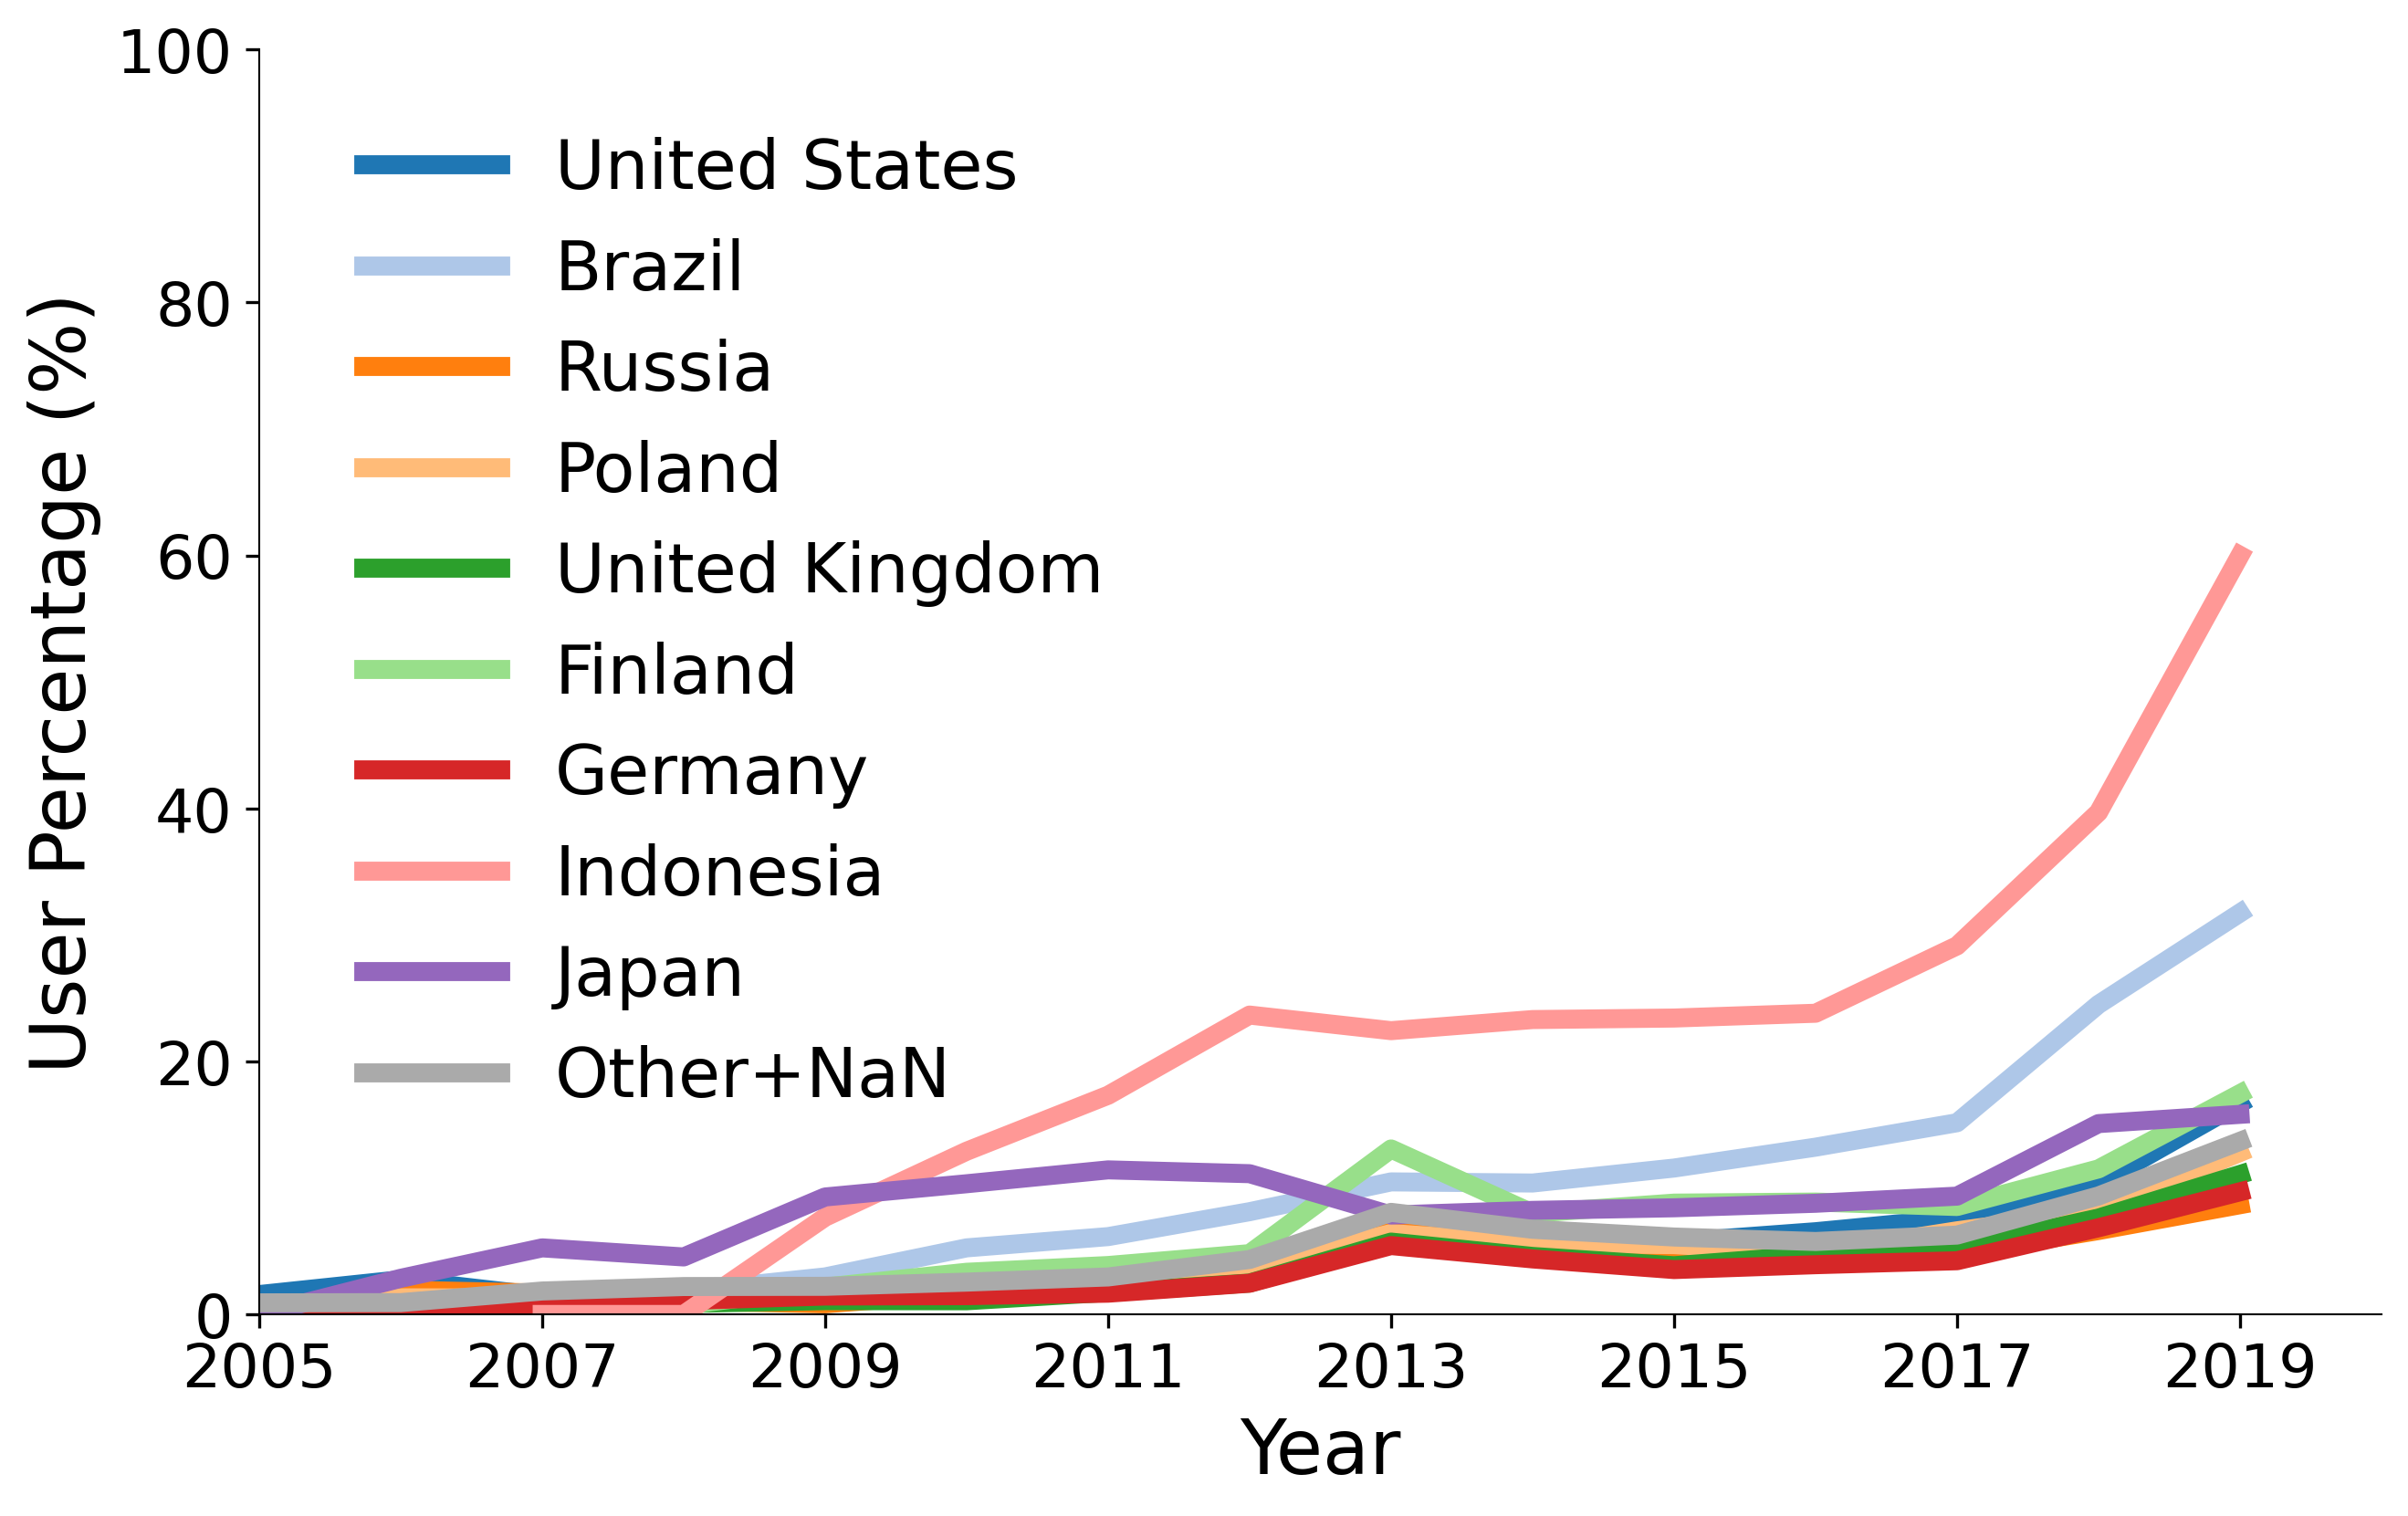

In [3]:
import matplotlib.pyplot as plt
import scienceplots
from matplotlib import cm

# --- スタイル設定 ---
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])
plt.rc('font', size=9)
plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('lines', linewidth=5)

# --- 国と色の設定 ---
fixed_countries = [
    "United States", "Brazil", "Russia", "Poland", "United Kingdom",
    "Finland", "Germany", "Indonesia", "Japan", "Other+NaN"
]

# matplotlib カラーマップから色を割り当て（tab20）
base_cmap = plt.get_cmap("tab20")

# "Other+NaN" は明示的にグレー、それ以外は順に色付け
country_colors = {
    country: base_cmap(i) if country != "Other+NaN" else "#aaaaaa"
    for i, country in enumerate(fixed_countries)
}

# --- 描画 ---
fig, ax = plt.subplots(figsize=(10, 6))

for country in fixed_countries:
    if country in df_country_ratio.columns:
        color = country_colors.get(country, "#aaaaaa")  # デフォルトは濃グレー
        ax.plot(df_country_ratio.index, df_country_ratio[country] * 100,
                marker='o', linestyle='-', label=country, color=color)

# 軸と範囲設定
ax.set_xlabel('Year')
ax.set_ylabel('User Percentage (%)')
# ax.set_title('K-POP Listening Rate by Country (2005–2019)')
ax.set_ylim(0, 100)
ax.set_xticks(range(2005, 2020, 2))
ax.set_xlim(2005, 2020)

# 軸装飾の調整
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(which='both', top=False, right=False)

# 凡例（グラフ左上インセット、枠なし）
ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),  # グラフ内の左上
    fontsize=18,
    frameon=False
)

plt.show()